In [ ]:
# 1️⃣ Install Java (required for Synthea)
!apt-get update -y
!apt-get install -y openjdk-11-jre-headless wget unzip

# 2️⃣ Mount Google Drive first so data saves permanently
from google.colab import drive
drive.mount('/content/drive')

# 3️⃣ Set a working directory inside your Drive
%cd /content/drive/MyDrive/
!mkdir -p synthea_run
%cd synthea_run

# 4️⃣ Download the Synthea master-branch-latest JAR (official link from the website)
!wget https://github.com/synthetichealth/synthea/releases/download/master-branch-latest/synthea-with-dependencies.jar -O synthea.jar

# 5️⃣ Create config file for CSV-only export
!echo "exporter.csv.export = true" > synthea.properties
!echo "exporter.fhir.export = false" >> synthea.properties
!echo "exporter.ccda.export = false" >> synthea.properties
!echo "exporter.cpcds.export = false" >> synthea.properties
!echo "exporter.text.export = false" >> synthea.properties
!echo "exporter.bulk_data.export = false" >> synthea.properties

# 6️⃣ Generate 1,000 patients (adjust -p later for 20k etc.)
!java -Xmx8G -jar synthea.jar -p 1000 -c synthea.properties

# 7️⃣ Check your output in Drive
!ls output/csv


Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,080 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,

In [ ]:
!java -Xmx8G -jar synthea.jar -p 19000 -c synthea.properties


Streaming output truncated to the last 5000 lines.
14758 -- Xavier983 VonRueden376 (74 y/o M) Westborough, Massachusetts  (103065)
14760 -- Korey682 Muller251 (61 y/o M) Taunton, Massachusetts  (83926)
14761 -- Casey401 Franecki195 (61 y/o M) Somerville, Massachusetts  (100853)
14762 -- Miriam769 Gleason633 (58 y/o F) Rehoboth, Massachusetts  (81008)
14763 -- Tomasa683 Hills818 (4 y/o F) Millis-Clicquot, Massachusetts  (6427)
14764 -- Myriam433 Huels583 (56 y/o F) Bellingham, Massachusetts  (77634)
14765 -- Alta896 Tianna963 Nikolaus26 (35 y/o F) Greenfield, Massachusetts  (51026)
14767 -- Jackie93 Hilll811 (44 y/o F) Sterling, Massachusetts  (62568)
14768 -- Laurel943 Schaefer657 (10 y/o F) Springfield, Massachusetts  (14451)
14766 -- Myrtis608 Bogisich202 (71 y/o F) Harvard, Massachusetts  (100227)
14769 -- Kacey193 Sari509 Jacobi462 (52 y/o F) Lawrence, Massachusetts  (75540)
14770 -- Malcolm243 Grant908 (49 y/o M) Springfield, Massachusetts DECEASED (67336)
14771 -- Annamaria402 Sh

In [ ]:
!ls /content/drive/MyDrive/synthea_run/output/csv


allergies.csv		 encounters.csv       patients.csv
careplans.csv		 imaging_studies.csv  payers.csv
claims.csv		 immunizations.csv    payer_transitions.csv
claims_transactions.csv  medications.csv      procedures.csv
conditions.csv		 observations.csv     providers.csv
devices.csv		 organizations.csv    supplies.csv


In [ ]:
import pandas as pd

# Set the base path where the CSVs are saved
path = "/content/drive/MyDrive/synthea_run/output/csv/"

# Load a few core tables
patients = pd.read_csv(path + "patients.csv")
encounters = pd.read_csv(path + "encounters.csv")
conditions = pd.read_csv(path + "conditions.csv")

# Print basic info
print("Patients:", patients.shape)
print("Encounters:", encounters.shape)
print("Conditions:", conditions.shape)

# Display first few rows
patients.head()


Patients: (22025, 28)
Encounters: (1320125, 15)
Conditions: (805490, 7)


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,f173c55d-26fa-40a7-4d3d-a0a77af219ec,2024-08-12,NaN,999-75-4930,NaN,NaN,NaN,Ashanti808,NaN,Jacobs452,...,Leominster,Massachusetts,Worcester County,25027.0,1420,42.603102,-71.795391,4724.95,0.00,40198
1,54b46b82-ccd2-47e3-b6ba-54c12a0f5233,1983-08-30,NaN,999-68-3161,S99932882,X81531722X,Mr.,Noah480,Renaldo199,Langosh790,...,Milford,Massachusetts,Worcester County,25027.0,1757,42.176644,-71.568395,76908.16,44985.15,111252
2,592f1cac-2d62-d178-d6d6-fbdc682f5974,1965-10-28,NaN,999-37-5820,S99939579,X48365034X,Ms.,Marcela739,NaN,Greenfelder433,...,Brockton,Massachusetts,Plymouth County,25023.0,2351,42.131652,-71.052953,270759.66,846175.28,195656
3,12da762c-7352-a8fc-0312-c51dfc2152dd,2009-04-28,NaN,999-85-1913,S99989135,NaN,NaN,Leon728,Janelle257,Goldner995,...,Dartmouth,Massachusetts,Bristol County,NaN,0,41.560245,-71.002488,23968.15,23862.14,141699
4,a1e5ea03-7d36-87ff-e2d9-c2db594b9de6,1997-01-04,NaN,999-20-2749,S99916462,X87817056X,Mrs.,Margaret865,Catherine271,Cartwright189,...,Boston,Massachusetts,Suffolk County,25025.0,2210,42.379165,-71.125928,199276.13,405946.09,29246


In [ ]:
# Number of unique patients
patients['Id'].nunique()

# Number of encounters per patient (first 5)
enc_per_patient = encounters.groupby('PATIENT').size().head()
print(enc_per_patient)

# Check a few columns
print(patients.columns)
print(encounters.columns)




PATIENT
00010e8f-590e-3608-5307-0c075d7b83b6     27
00037657-224c-8a27-8e00-252779d41cc3     36
0004e2d2-969c-2b8e-b5c3-b1cc51eac06a     72
00070edc-4a3d-6dcb-de91-39d828ea23c5    544
00097b68-2bce-3e49-4b50-c28f44deed0b    302
dtype: int64
Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'MIDDLE', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE',
       'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE',
       'COUNTY', 'FIPS', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE', 'INCOME'],
      dtype='object')
Index(['Id', 'START', 'STOP', 'PATIENT', 'ORGANIZATION', 'PROVIDER', 'PAYER',
       'ENCOUNTERCLASS', 'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST',
       'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE',
       'REASONDESCRIPTION'],
      dtype='object')


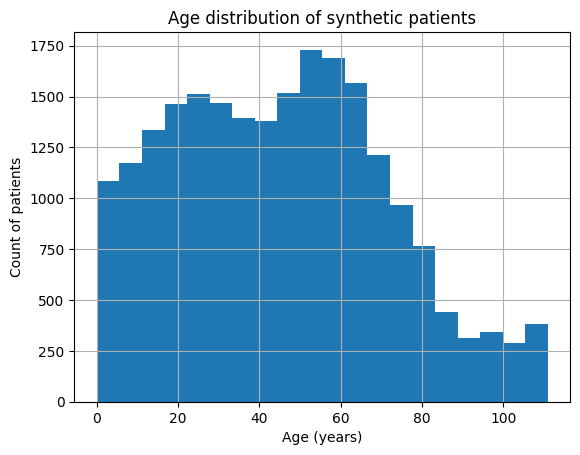

In [ ]:
import matplotlib.pyplot as plt

# Convert birthdate to age in years
patients['BIRTHDATE'] = pd.to_datetime(patients['BIRTHDATE'])
patients['AGE'] = (pd.Timestamp('today') - patients['BIRTHDATE']).dt.days / 365

patients['AGE'].hist(bins=20)
plt.xlabel("Age (years)")
plt.ylabel("Count of patients")
plt.title("Age distribution of synthetic patients")
plt.show()


In [ ]:
# Filter for inpatient encounters (hospital admissions/discharges):
inpatient = encounters[encounters['ENCOUNTERCLASS'] == 'inpatient'].copy()


In [ ]:
# Convert START and STOP times to datetime:
inpatient['START'] = pd.to_datetime(inpatient['START'])
inpatient['STOP']  = pd.to_datetime(inpatient['STOP'])


In [ ]:
# Create the “readmission within 30 days” label
inpatient = inpatient.sort_values(['PATIENT', 'START'])
inpatient['NEXT_START'] = inpatient.groupby('PATIENT')['START'].shift(-1)
inpatient['READMIT_30D'] = (
    (inpatient['NEXT_START'] - inpatient['STOP']).dt.days <= 30
) & (
    (inpatient['NEXT_START'] - inpatient['STOP']).dt.days > 0
)
inpatient['READMIT_30D'] = inpatient['READMIT_30D'].fillna(False).astype(int)


In [ ]:
# Engineering some demographic features
# Age
patients['BIRTHDATE'] = pd.to_datetime(patients['BIRTHDATE'])
patients['AGE'] = (pd.Timestamp('today') - patients['BIRTHDATE']).dt.days / 365

# Merge patient info into encounters
data = inpatient.merge(patients[['Id','AGE','GENDER','RACE','ETHNICITY']],
                       left_on='PATIENT', right_on='Id', how='left')

# Example feature set
X = data[['AGE', 'GENDER', 'RACE', 'ETHNICITY']].copy()
y = data['READMIT_30D']

# Convert categorical features to dummies
X = pd.get_dummies(X, drop_first=True)



In [ ]:
# Train baseline logistic model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.82      1.00      0.90      5362
           1       0.00      0.00      0.00      1175

    accuracy                           0.82      6537
   macro avg       0.41      0.50      0.45      6537
weighted avg       0.67      0.82      0.74      6537

AUC: 0.7124067710524018


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Controlling for class weights (for class imbalance)
model = LogisticRegression(max_iter=500, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.91      0.62      0.73      5362
           1       0.29      0.71      0.41      1175

    accuracy                           0.63      6537
   macro avg       0.60      0.66      0.57      6537
weighted avg       0.79      0.63      0.67      6537

AUC: 0.7115717380780433


In [ ]:
# Viewing coefficients of all features
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

display(coef_df)


,Feature,Coefficient
1,GENDER_M,0.897630
4,RACE_native,0.836873
6,RACE_white,0.133481
0,AGE,0.030767
5,RACE_other,0.007855
2,RACE_black,-0.108649
7,ETHNICITY_nonhispanic,-0.167698
3,RACE_hawaiian,-0.312879


In [ ]:
### Creating features from Encounters table

# Prep
enc = encounters.copy()

# Ensure datetimes
enc['START'] = pd.to_datetime(enc['START'])
enc['STOP']  = pd.to_datetime(enc['STOP'])

# Sort once (by patient + time)
enc = enc.sort_values(['PATIENT','START']).reset_index(drop=True)

In [ ]:
# Per-encounter basics
# Length of stay (days), clipped at 0
enc['LOS_days'] = (enc['STOP'] - enc['START']).dt.total_seconds()/86400
enc['LOS_days'] = enc['LOS_days'].clip(lower=0)

# Admission timing features
enc['admit_hour'] = enc['START'].dt.hour
enc['admit_dow']  = enc['START'].dt.dayofweek  # 0=Mon
enc['is_weekend'] = enc['admit_dow'].isin([5,6]).astype(int)
enc['is_night']   = enc['admit_hour'].between(22,23) | enc['admit_hour'].between(0,6)
enc['is_night']   = enc['is_night'].astype(int)

# Calendar context
enc['admit_month']   = enc['START'].dt.month
enc['admit_quarter'] = enc['START'].dt.quarter
enc['admit_season']  = pd.cut(enc['START'].dt.month,
                              bins=[0,3,6,9,12],
                              labels=['Winter','Spring','Summer','Fall'],
                              right=True)
